In [2]:
import numpy as np
np.random.seed(123)

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import configparser
import os

config = configparser.ConfigParser()
config.read('../../config.ini')

data_dir = config['PATHS']['json-export']
input_dir = data_dir+'feature_arrays/'
batch_size = 128
num_classes = 11
epochs = 25

for colorspace in ['bgr']:
    print ('colorspace:', colorspace)

    # the data, split between train and test sets
    #input_file = 'baseline_arrays.npz'
    input_file = 'baseline_arrays_'+colorspace+'_resampled.npz'
    import_arrays = np.load(input_dir+input_file,allow_pickle=True)
    print ('input dir:', input_file)

    # exclude 1st column from every array (contains id)
    x_train = import_arrays['train_x'][:,1:]
    y_train = import_arrays['train_y'][:,1:]
    x_test = import_arrays['dev_x'][:,1:]
    y_test = import_arrays['dev_y'][:,1:]

    print(x_train.shape[0], 'train samples')
    print(x_test.shape[0], 'test samples')

    ## convert class vectors to binary class matrices
    #y_train = keras.utils.to_categorical(y_train, num_classes)
    #y_test = keras.utils.to_categorical(y_test, num_classes)

    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(512,)))
    model.add(Dropout(0.2))
    model.add(Dense(240, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(24, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))

    model.summary()

    model.compile(loss='categorical_crossentropy',
                  optimizer=RMSprop(),
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(x_test, y_test))

    score = model.evaluate(x_test, y_test, verbose=0)

colorspace: bgr
input dir: baseline_arrays_bgr_resampled.npz
165000 train samples
17083 test samples


In [3]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(512,)))
model.add(Dropout(0.2))
model.add(Dense(240, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(24, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))


W0724 12:20:36.408709 139786500986688 deprecation_wrapper.py:119] From /home/simeon/Dokumente/Masterarbeit/environments/ma_env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0724 12:20:36.427554 139786500986688 deprecation_wrapper.py:119] From /home/simeon/Dokumente/Masterarbeit/environments/ma_env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0724 12:20:36.431724 139786500986688 deprecation_wrapper.py:119] From /home/simeon/Dokumente/Masterarbeit/environments/ma_env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0724 12:20:36.444033 139786500986688 deprecation_wrapper.py:119] From /home/simeon/Dokumente/Masterarbeit/environments/ma_env/lib/python3.7/site-pac

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 240)               123120    
_________________________________________________________________
dropout_2 (Dropout)          (None, 240)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 24)                5784      
_________________________________________________________________
dropout_3 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 11)                275       
Total para

In [6]:
# Merge durch Konkatenation (16 Dimensionen Embedding, 16 Nodes im BU-Dense-Layer)

from keras.layers import Input, Dense, Dropout,Embedding,concatenate,Flatten
from keras.models import Model
from keras.utils.vis_utils import model_to_dot
from keras.optimizers import RMSprop
from IPython.display import SVG


# Inputs
inputs = Input(shape=(512,), name='input')

x = Dense(240, activation='relu',name='dense_0')(inputs)
x = Dropout(0.2, name='dropout_0')(x)
x = Dense(24, activation='relu',name='dense_1')(x)
x = Dropout(0.2, name='dropout_1')(x)

predictions = Dense(num_classes, activation='softmax', name='predictions')(x)

model2 = Model(inputs=inputs, outputs=predictions)


model2.summary()

model2.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model2.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model2.evaluate(x_test, y_test, verbose=0)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 512)               0         
_________________________________________________________________
dense_0 (Dense)              (None, 240)               123120    
_________________________________________________________________
dropout_0 (Dropout)          (None, 240)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 24)                5784      
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
predictions (Dense)          (None, 11)                275       
Total params: 129,179
Trainable params: 129,179
Non-trainable params: 0
_________________________________________________________________
Trai

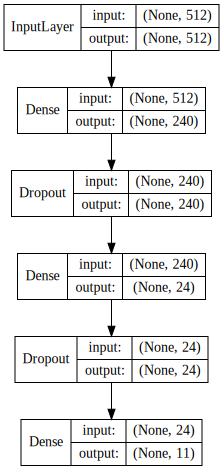

In [8]:
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

SVG(model_to_dot(model2,show_shapes=True,show_layer_names=False,rankdir='TB').create(prog='dot', format='svg'))